# GPS PRN proccessing


In [1]:
%matplotlib inline

## Creation of the signal

In [2]:
from blocksim.dsp.DSPSignal import DSPSignal
from blocksim.dsp import createGoldSequence

y1 = createGoldSequence(name="s1", sv=[2, 6], repeat=1, chip_rate=1.023e6)
y = createGoldSequence(name="s1", sv=[2, 6], repeat=20, chip_rate=1.023e6)
y = y.applyGaussianNoise(pwr=200)

[INFO] - Registered blocksim.loggers.CSVLogger
[INFO] - Registered blocksim.loggers.PickleLogger
[INFO] - Registered blocksim.loggers.PsqlLogger
[INFO] - Registered blocksim.loggers.XlsLogger


## Processing

In [3]:
# Correlation
z = y.correlate(y1)

# Integration
zi = z.integrate(period=1e-3, offset=511 / (1.023e6))

## Plotting

Text(0, 0.5, 'Intégration')

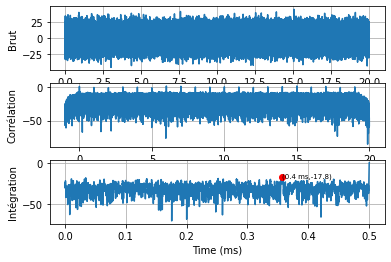

In [4]:
from matplotlib import pyplot as plt

from blocksim.graphics import plotDSPLine

fig = plt.figure()
axe = fig.add_subplot(311)
axe.grid(True)
_=plotDSPLine(y, axe)
axe.set_ylabel("Brut")

axe = fig.add_subplot(312)
axe.grid(True)
_=plotDSPLine(z, axe)
axe.set_ylabel("Corrélation")

axe = fig.add_subplot(313)
axe.grid(True)
_=plotDSPLine(zi, axe, find_peaks=1)
axe.set_ylabel("Intégration")